In [1]:
#importiamo i pacchetti necessari per un'analisi del dataframe
import pandas as pd
import seaborn as sns

#estraiamo i dati utilizzando la funzione read_csv di pandas
covid19 = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
covid19.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [2]:
#Si richiede di verificare le dimensioni del dataset e i relativi metadati utilizzando il metodo .shape e .info:


In [3]:
print('il numero di righe e di colonne sono:', covid19.shape)

il numero di righe e di colonne sono: (429435, 67)


In [4]:
print('i metadati sono:')
covid19.info()

i metadati sono:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 no

In [5]:
#dopo aver analizzato i dati attraverso il metodo info, eseguiamo un'analisi dei dati nulli con un ciclo "for":
for col in covid19.columns:
    print(col,'null = ', covid19[col].isnull().sum()) #per ogni valore della lista contenente le colonne del df covid 19 stampa nome colonna e la somma dei nulli (di tutti i valori True)

iso_code null =  0
continent null =  26525
location null =  0
date null =  0
total_cases null =  17631
new_cases null =  19276
new_cases_smoothed null =  20506
total_deaths null =  17631
new_deaths null =  18827
new_deaths_smoothed null =  20057
total_cases_per_million null =  17631
new_cases_per_million null =  19276
new_cases_smoothed_per_million null =  20506
total_deaths_per_million null =  17631
new_deaths_per_million null =  18827
new_deaths_smoothed_per_million null =  20057
reproduction_rate null =  244618
icu_patients null =  390319
icu_patients_per_million null =  390319
hosp_patients null =  388779
hosp_patients_per_million null =  388779
weekly_icu_admissions null =  418442
weekly_icu_admissions_per_million null =  418442
weekly_hosp_admissions null =  404938
weekly_hosp_admissions_per_million null =  404938
total_tests null =  350048
new_tests null =  354032
total_tests_per_thousand null =  350048
new_tests_per_thousand null =  354032
new_tests_smoothed null =  325470
new_

In [6]:
#gli esercizi chiedono di filtrare le date quindi bisognerà trasformare la colonna 'date' da object a data:


In [7]:
print(covid19['date'].dtype)

object


In [8]:
#modifica della data con il metoo 'to_datetime'
covid19['date'] = pd.to_datetime(covid19['date'], format='%Y-%m-%d') #funzione di pandas to_datetime (colonna, formato)
covid19['date']

0        2020-01-05
1        2020-01-06
2        2020-01-07
3        2020-01-08
4        2020-01-09
            ...    
429430   2024-07-31
429431   2024-08-01
429432   2024-08-02
429433   2024-08-03
429434   2024-08-04
Name: date, Length: 429435, dtype: datetime64[ns]

In [9]:
#conferma della mofica
print(covid19['date'].dtype)

datetime64[ns]


In [10]:
#Si chiede di trovare, per ogni continente:
# a. il numero di casi fin dall'inizio della pandemia;
# b. la percentuale rispetto al totale mondiale del numero di casi.

In [11]:
#Da un'analisi delle colonno che riguardano il numero dei casi ('total_cases' e 'new_cases'), è chiaro che la colonna da usare per calcolare i casi totali è 'new_cases'.
#Infatti, total_cases, che potrebbe sembrare quella intuitivamente corretta, contiene valori ripetuti.
#Cominciamo da un'analisi dei casi totali divisi per continente con l'uso di groupby (EXTRA): 
totalcaseslocation = covid19.groupby(['continent','location'])['new_cases'].agg(total_cases=('sum'), total_cases_mean=('mean')) #raggruppiamo per continente e nazione ed inseriamo due colonne
totalcaseslocation

total_cases  total_cases_mean
continent     location                                   
Africa        Algeria          272139.0        162.568100
              Angola           107481.0         64.206093
              Benin             28036.0         16.747909
              Botswana         330696.0        197.548387
              Burkina Faso      22139.0         13.225209
...                                 ...               ...
South America Paraguay         735759.0        439.521505
              Peru            4526977.0       2704.287336
              Suriname          82501.0         49.283751
              Uruguay         1041346.0        622.070490
              Venezuela        552695.0        330.164277

[243 rows x 2 columns]

In [12]:
#permettiamo all'utente di analizzare un continente specifico (EXTRA):
print('la lista dei continenti è:', covid19['continent'].unique())
continente = input('inserire un continente')
totalcaseslocation.loc[continente]

la lista dei continenti è: ['Asia' nan 'Europe' 'Africa' 'Oceania' 'North America' 'South America']


inserire un continente Asia


,total_cases,total_cases_mean
location,,
Afghanistan,235214.0,140.510155
Armenia,452273.0,270.175030
Azerbaijan,835757.0,499.257467
Bahrain,696614.0,416.137395
Bangladesh,2051348.0,1225.416965
Bhutan,62697.0,37.453405
Brunei,347723.0,207.719833
Cambodia,139319.0,83.225209
China,99373219.0,59362.735364


In [13]:
#Utilizziamo i dati del precedente dataset per sommare i valori in total_cases e calcolare i casi totali per continente dall'inizio della pandemia:
totalcasescontinent = totalcaseslocation.groupby('continent')['total_cases'].agg(total_cases = ('sum'), total_cases_mean=('mean'))
totalcasescontinent['total_cases_mean'] = round(totalcasescontinent['total_cases_mean'],2)
totalcasescontinent = totalcasescontinent.sort_values(by='total_cases', ascending=False)
totalcasescontinent

,total_cases,total_cases_mean
continent,,
Asia,301564180.0,5913023.14
Europe,252916868.0,4598488.51
North America,124492698.0,3036407.27
South America,68811012.0,4915072.29
Oceania,15003468.0,625144.50
Africa,13146831.0,226669.50


In [14]:
#la percentuale rispetto al totale mondiale del numero di casi è calcolato dividendo i casi totali per continente e la somma dei casi totali (vedi df precedente):
totalcases_perc = totalcasescontinent['total_cases'].to_frame() #copiando una sola colonna il dataframe diveta una series, quindi usiamo il metodo to_fram per ottenre una tabella bidimensionale
totmondial = totalcasescontinent['total_cases'].sum() #inseriamo il totale in una variabile
totalcases_perc['%mondiale'] = round((totalcasescontinent['total_cases']/totmondial),4)*100 #creiamo la colonna con le percentuali
totalcases_perc

,total_cases,%mondiale
continent,,
Asia,301564180.0,38.86
Europe,252916868.0,32.60
North America,124492698.0,16.04
South America,68811012.0,8.87
Oceania,15003468.0,1.93
Africa,13146831.0,1.69


In [15]:
#proviamo ad incrociare questi dati con la popolazione totale per continente e la densità abitativa (non c'è correlazione tra numero di casi e popolazione totale o la densità abitativa, solo i primi tre valori)
totalpopulation = (covid19.groupby(['continent', 'location'])['population'].mean().to_frame()) #creiamo un df raggruppando per continente e nazione
totalpopulation = totalpopulation.groupby('continent')['population'].agg(poptotale=('sum')) #utiliziamo il df creato per sommare la popolazione per continente
totalpopulation = totalpopulation.sort_values(by='poptotale', ascending=False) #ordiniamo dal più grande al più piccolo
totalpopulationdensity = covid19.groupby(['continent', 'location'])['population_density'].agg(density=('mean')) #creiamo un secondo gruppo per la densità di popolazione
totalpopulation['density'] = round(totalpopulationdensity.groupby('continent')['density'].mean(),2) #aggiungiamo la colonna densità di popolazione al precedente df utilizzando il df creato prima
totalpopulation

,poptotale,density
continent,,
Asia,4.721838e+09,987.35
Africa,1.426737e+09,103.49
Europe,8.144933e+08,626.70
North America,6.003237e+08,279.98
South America,4.368167e+08,24.39
Oceania,4.503891e+07,149.49


In [16]:
#Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
# a. l'evoluzione del casi totali dall'inizio alla fine dell'anno;
# b. il numero di nuovi casi rispetto alla data;
#          k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni.

In [17]:
#filtriamo i dati relativi a Italia, anno 2022, creando una variabile filtro:
filtro_location_it = covid19['location']=='Italy' #creiamo una variabile filtro per la nazione
filtro_date = covid19['date'].dt.year==2022 #creiamo una variabile filtro per l'anno
filtro = filtro_location_it & filtro_date #inseriamoli in una variabile
covid19_italy = covid19[filtro] #applichiamo il filtro ad un nuovo df
covid19_italy

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.3,12.99,8.06,2849.4834
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186362,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186363,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186364,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186365,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Totali_Italia_2022'}, xlabel='date'>

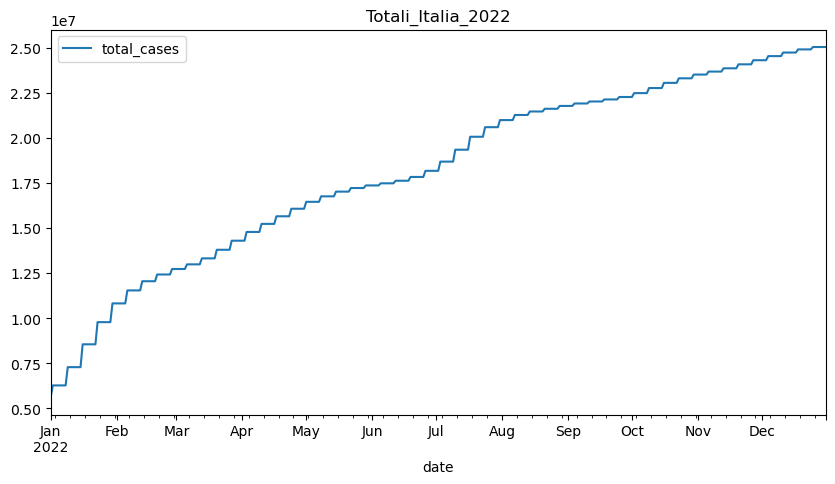

In [18]:
#Una volta filtrati i dati, costruiamo i grafico, (utilizziamo la colonna 'total_cases' per non avere valori nulli o valori 0):
covid19_italy.plot(kind='line', x='date', y='total_cases', figsize=(10,5), title='Totali_Italia_2022')

<Axes: title={'center': 'Andamento_nuovi_casi_2022'}, xlabel='date'>

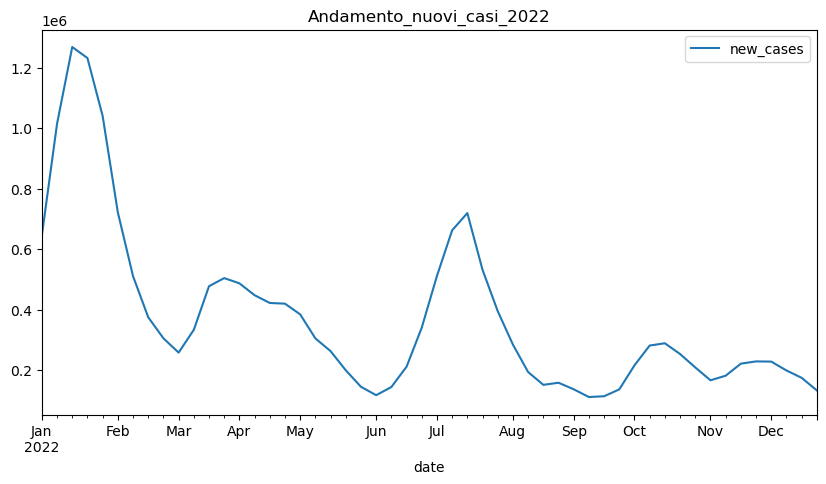

In [19]:
#Osserviamo l'andamento dei nuovi casi rispetto alla data eliminando i valori 0:
filtro_valori = covid19_italy['new_cases'] > 0 #eliminamo i valori = 0
covid19_it_val = covid19_italy[filtro_valori] #aggiungiamo un filtro al df creato in precedenza
covid19_it_val.plot(kind='line', x='date', y='new_cases', figsize=(10,5), title='Andamento_nuovi_casi_2022')

In [20]:
#Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso):
# a. scrivere un breve commento a riguardo.

In [21]:
#Creaiamo dei filtri per slezinare paesi e date desiderate:
filtro_location = (covid19['location'] == ('Italy')) | (covid19['location'] == ('Germany')) | (covid19['location'] == ('France'))
filtro_meseanno = ((covid19['date'].dt.month >= 5) & (covid19['date'].dt.year == 2022)) | ((covid19['date'].dt.month <= 4) & (covid19['date'].dt.year == 2023))
filtronazioni = filtro_location & filtro_meseanno
covid19_nazioni = covid19[filtronazioni]
covid19_nazioni

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.143,146744.0,867.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,89536.72,6.19,6.24,1385.4463
131215,FRA,Europe,France,2022-05-02,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131216,FRA,Europe,France,2022-05-03,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131217,FRA,Europe,France,2022-05-04,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131218,FRA,Europe,France,2022-05-05,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186482,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186483,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186484,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186485,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


In [22]:
covid19_nazioni.groupby('location')['icu_patients'].sum() #osserviamo i dati numerici

location
France     334457.0
Germany    373171.0
Italy       84408.0
Name: icu_patients, dtype: float64

<Axes: xlabel='location', ylabel='icu_patients'>

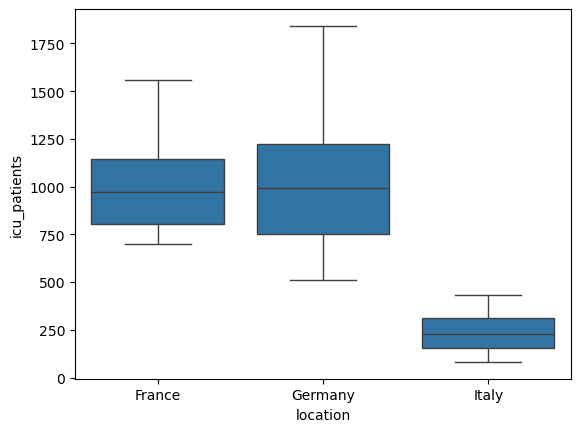

In [23]:
#Creiamo un grafico Boxplot per osservare le caratteristiche dei dati riguardo i pazienti in terapia intensiva:
sns.boxplot(data=covid19_nazioni[['location', 'icu_patients']], x='location', y='icu_patients')

In [24]:
#Per capire la distribuzione dei dati, creiamo un data frame con dati che possono essere correlati con pazienti in terapia intensiva: posti disponibili in ospedale, popolazione, casi totali e gradi di rigore:
df_analisi =covid19_nazioni.groupby('location').agg({'hospital_beds_per_thousand': 'mean',
                                                    'population': 'mean',
                                                    'total_cases': 'max',
                                                    'stringency_index': 'max'})
df_analisi = df_analisi.sort_values(by='population', ascending=False)
df_analisi

,hospital_beds_per_thousand,population,total_cases,stringency_index
location,,,,
Germany,8.00,83369840.0,38405257.0,14.56
France,5.98,67813000.0,38842584.0,18.82
Italy,3.18,59037472.0,25795509.0,22.52


In [25]:
#La Germania, che ha il numero maggiore di pazienti in terapia intensiva, è il paese con più posti letto in ospedale e popolazione.
#Un dato fondamentale per capire la distribuzione è l'indice di rigore. Valori più alti di stringency_index indicano una risposta più severa.
#La Germania ha l'indice più basso.

In [26]:
#Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
# a. mostrare la somma dei pazienti ospitalizzati per ognuna;
# b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno.

In [27]:
#Creiamo dei filtri per estrarre i dati che interessano l'analisi:
filtrolocation2 = (covid19['location'] == ('Spain')) | (covid19['location'] == ('Germany')) | (covid19['location'] == ('France')) | (covid19['location'] == ('Italy'))
filtroanno = (covid19['date'].dt.year == 2023)
filtronazioni2023 = filtrolocation2 & filtroanno
covid19_nazioni23 = covid19[filtronazioni2023]
covid19_nazioni23

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131459,FRA,Europe,France,2023-01-01,38141254.0,151707.0,21672.429,162475.0,808.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,122241.83,6.64,25.91,1887.7128
131460,FRA,Europe,France,2023-01-02,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131461,FRA,Europe,France,2023-01-03,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131462,FRA,Europe,France,2023-01-04,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131463,FRA,Europe,France,2023-01-05,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364038,ESP,Europe,Spain,2023-12-27,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
364039,ESP,Europe,Spain,2023-12-28,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
364040,ESP,Europe,Spain,2023-12-29,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN
364041,ESP,Europe,Spain,2023-12-30,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632,NaN,NaN,NaN,NaN


In [28]:
#hosp_patients è un valore non utile ai fini dell'ossrvazione per raggruppamento dei dati, in quanto la semplice somma non permette di fare un calcolo affidabile, (un paziente viene sommato più volte)
covid19_hp = covid19_nazioni23.groupby('location')['hosp_patients'].sum()
covid19_hp = covid19_hp.sort_values()
covid19_hp

location
Germany          0.0
Spain       354602.0
Italy      1175272.0
France     1382574.0
Name: hosp_patients, dtype: float64

<Axes: xlabel='location', ylabel='hosp_patients'>

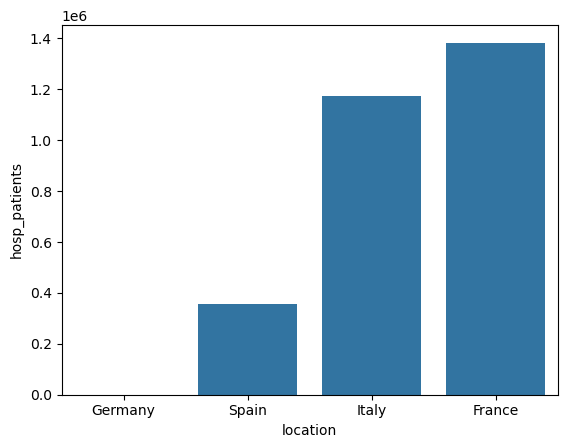

In [29]:
sns.barplot(data=covid19_hp) #estraiamo un grafico a barre

In [30]:
#La Francia è il paese con il maggior numero di pazienti ospedalizzati (non attendibile)

In [31]:
#Calcoliamo i dati nulli in hosp_patients, con un ciclo for:
for i in covid19_nazioni23['location'].unique():
    location = covid19_nazioni23[covid19_nazioni23['location']==i] #selezioniamo le nazioni
    calcolonulli = location['hosp_patients'].isna().sum() #calcoliamo i nulli
    print(i,calcolonulli, 'nulli')

France 275 nulli
Germany 365 nulli
Italy 0 nulli
Spain 203 nulli


In [32]:
#Per capire se è possibile sostituirli, effettuiamo un analisi su come sono distribuiti:
#Germania ha solo valori nulli, quindi non c'è un modo efficace per sostiutirli
#Le altre nazioni hanno una distibuzione non uniforme, di seguito il grafico per l'Italia:

<Axes: xlabel='date'>

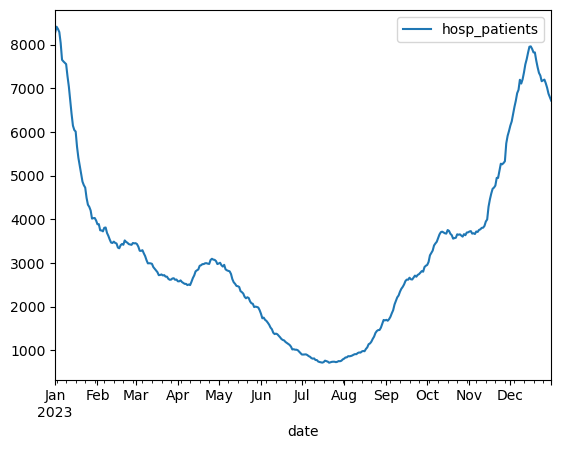

In [33]:
covid19_nazioni23[covid19_nazioni23['location']=='Italy'].plot(kind='line', x='date', y='hosp_patients')

In [34]:
#Un andamento di questo tipo, osservabile anche per Spagna e Francia non permette di sostituire i dati in maniera efficace anche per le altre nazioni

In [35]:
#analisi aggiuntiva che potrebbe spiegare la presenza di dati nulli è l'osservazion di vaccinazioni per nazione:
vaccini = covid19
vaccini = vaccini[filtronazioni2023]
vaccini = vaccini[['location', 'date', 'people_fully_vaccinated', 'hosp_patients']]
vaccinipernazione = vaccini.groupby('location')['people_fully_vaccinated'].max().sort_values(ascending=False)
vaccinipernazionedf = pd.DataFrame(vaccinipernazione)
vaccinipernazionedf

,people_fully_vaccinated
location,
Germany,63563414.0
France,53192478.0
Italy,47947097.0
Spain,40739123.0


<Axes: xlabel='location', ylabel='people_fully_vaccinated'>

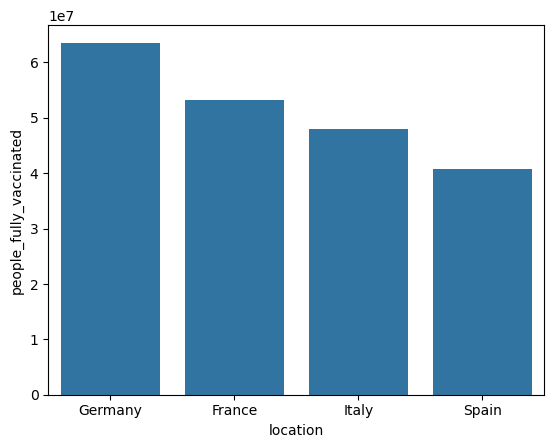

In [36]:
sns.barplot(data=vaccinipernazionedf, x='location', y='people_fully_vaccinated')

In [37]:
#Non c'è correlazione con l'assenza di ospedalizzazioni

In [39]:
#EXTRA il calcolo dei pazienti ospedalizzati potrebbe essere fatto con un ciclo che somma i numeri se sono maggiorni del numero precedente
filtro_location_it = covid19['location']=='Italy'
covid19_val = covid19_nazioni23['hosp_patients'][filtro_location_it]
covid19_val = covid19_val.reset_index(drop=True)
n = 0
valori = []

while n < len(covid19_val)-1:
    if covid19_val.loc[n]>=covid19_val.loc[n+1]:
        somma = covid19_val.loc[n]
    else:
        somma = covid19_val.loc[n] + covid19_val.loc[n+1]
    valori.append(somma)
    n+=1

print('Pazienti ospedalizzati in Italia =', sum(valori))


Pazienti ospedalizzati in Italia = 1705645.0
